# 直方图均衡化：

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 


(256, 256)
119


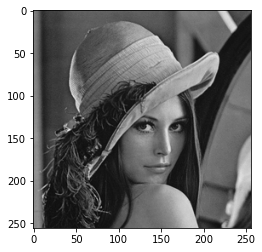

In [3]:
img = plt.imread("..//pic/LENA.bmp", format = "gray")[:,:,0]
print(img.shape)
print(img[50,50])
plt.imshow(img, cmap="gray")

In [4]:
def Histogram(img, k):
    histo = np.zeros([k])
    for i in range(img.shape[0]):
       for j in range(img.shape[1]):
           histo[img[i,j]] += 1
    histo /= img.shape[0] * img.shape[1]
    plt.plot(histo)
    return histo

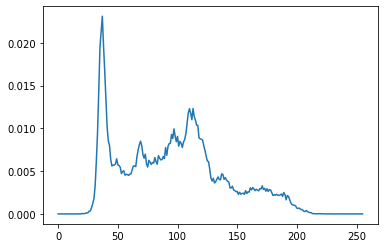

In [5]:
histo = Histogram(img, 256)

In [6]:
def CDF(histo):
    cdf = np.zeros(histo.shape[0])
    for i in range(histo.shape[0]):
        for j in range(i):
            cdf[i] += histo[j]
    plt.plot(cdf)
    return cdf

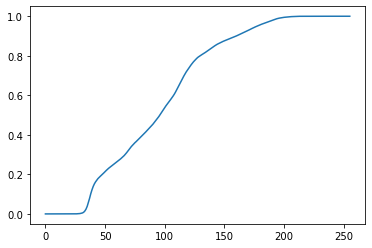

In [7]:
cdf = CDF(histo)

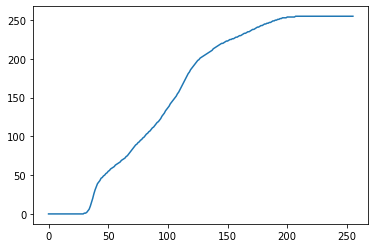

In [8]:
eq = np.zeros(256)
for i in range(256):
    eq[i] = int(np.around(cdf[i] * 255))
plt.plot(eq)

186.0


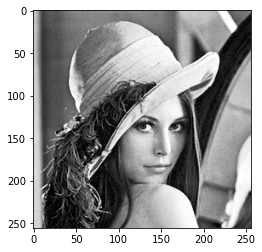

In [20]:
eqimg = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        eqimg[i,j] = eq[img[i,j]]
plt.imshow(eqimg, cmap = "gray")
print(eqimg[50,50])

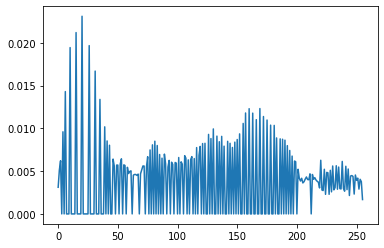

In [10]:
eqhisto = Histogram(eqimg.astype(int), 256)

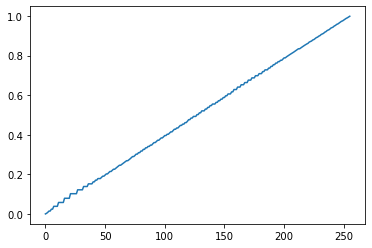

In [11]:
eqcdf = CDF(eqhisto)

# 直方图规定化

(256, 256)


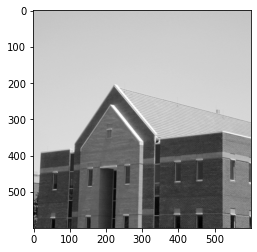

In [12]:
img2 = plt.imread("../pic/BUILDING.bmp")
plt.imshow(img2)
print(img.shape)

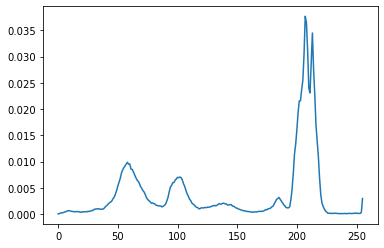

In [13]:
histo2 = Histogram(img2, 256)

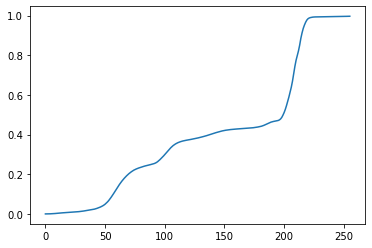

In [14]:
cdf2 = CDF(histo2)

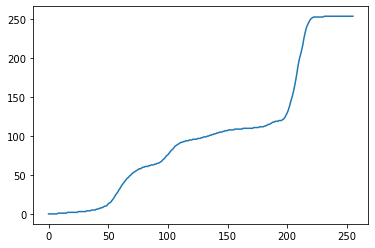

In [32]:
gz = np.zeros(256)
for i in range(256):
    gz[i] = (np.around(cdf2[i] * 255))
plt.plot(gz)

In [46]:
def Remap(gz):
    gz = list(gz)
    remap = []
    temp_pre = 0 
    for n in range(256):
        try:
            temp = gz.index(n)
            temp_pre = temp
        except BaseException:
            temp = temp_pre 
        remap.append(temp)
    remap = np.array(remap)
    return remap

In [47]:
remap = Remap(gz)

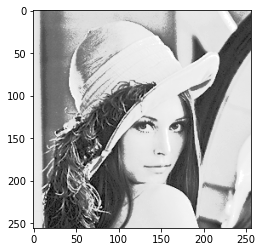

In [48]:
specimg = np.zeros(img.shape)
for i in range(eqimg.shape[0]):
    for j in range(eqimg.shape[1]):
        specimg[i,j] = remap[int(eqimg[i,j])]                   
plt.imshow(specimg, cmap = "gray")

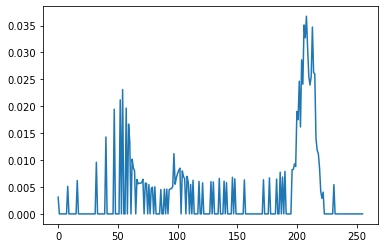

In [49]:
spechisto = Histogram(specimg.astype(int), 256)

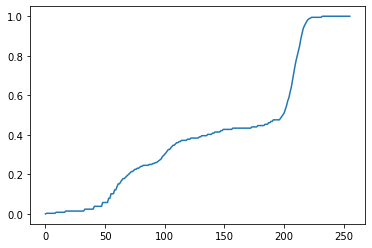

In [50]:
speccdf = CDF(spechisto)